# Performing Linear Regression
### in order to build a Predictor of the release year

In this notebook, we will be using the scikit-learn library to perform a logistic regression on the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from tueplots import bundles

plt_settings = bundles.neurips2021(usetex=False)
plt.rcParams.update(plt_settings)

fig_width, fig_height = plt_settings['figure.figsize']

In [2]:
### import the datasets
train = pd.read_csv('../data/train_set.csv')
test = pd.read_csv('../data/test_set.csv')

This cell sorts the data and does some preprocessing, in order for the regression to work

In [3]:
polynomial_degree = -1
predictors = ['explicit', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
X_train = train[predictors]
X_test = test[predictors]

scaler = preprocessing.StandardScaler().fit(pd.concat([train, test])[predictors])

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

y_train = train['year']
y_test = test['year']

In [4]:
if polynomial_degree != -1:
    poly = preprocessing.PolynomialFeatures(degree = polynomial_degree, interaction_only=False, include_bias=False)
    X_train = poly.fit_transform(X_train)
    X_test = poly.transform(X_test)

In [5]:
reg = LinearRegression().fit(X_train, y_train)
reg.coef_.shape

(13,)

Fitting the sklearn Logistic Regression Model 

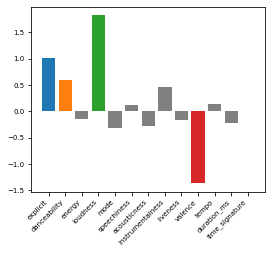

In [6]:
if polynomial_degree == -1:
    interesting_features = ['explicit', 'danceability','loudness','valence']
    fig, ax = plt.subplots(figsize=(fig_width/1.5,fig_height))
    for f, c in zip(predictors,reg.coef_):
        ax.bar(f, c, color='grey' if f not in interesting_features else None)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    #ax.hlines(0,-.2, 11.2, colors='grey', linestyle='dotted')
    plt.savefig('../figs/lin_coefs.pdf',bbox_inches='tight')
    plt.show()

In [7]:
predicted_values = reg.predict(X_test)
rounded_preds = np.array(list(map(round, predicted_values)))

random_values = np.random.randint(y_test.min(), y_test.max(), size=(10,) + y_test.shape)

print(f'L1 Error of random: {np.array([np.abs(random - y_test).mean() for random in random_values]).mean()}')
print(f'L1 Error of predictor: {np.abs(predicted_values - y_test).mean()}')
print(f'L2 Error of random: {np.array([((random - y_test)**2).mean() for random in random_values]).mean()}')
print(f'L2 Error of predictor: {((predicted_values - y_test)**2).mean()}')
print(f'Accuracy of random: {np.array([np.sum(random == y_test)/len(y_test) for random in random_values]).mean()}')
print(f'Accuracy of predictor: {np.sum(rounded_preds == y_test)/len(y_test)}')
print(f'Score of predictor: {reg.score(X_test, y_test)}')

L1 Error of random: 10.116526954478143
L1 Error of predictor: 6.113696974889281
L2 Error of random: 153.71708259982614
L2 Error of predictor: 53.87570765992985
Accuracy of random: 0.03132101186861958
Accuracy of predictor: 0.04506318718521075
Score of predictor: 0.09169394941672049


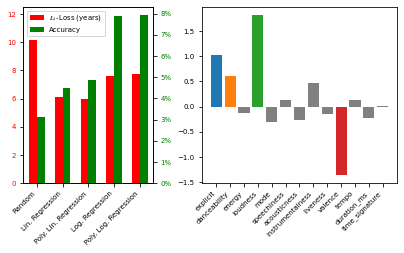

In [19]:
names = ['Random', 'Lin. Regression', 'Poly. Lin. Regression', 'Log. Regression', 'Poly. Log. Regression']
l1_losses = [10.129583746499913, 6.113696974889281, 5.956544964282252, 7.596235415401686, 7.7255190609943085]
l2_losses = [153.8909257698003, 53.87570765992985, 51.64688522673475, 95.0179798447513, 98.38477129864627]
accuracy = [0.031334553539836545, 0.04506318718521075, 0.04871070185171433, 0.07885620929308108, 0.07910520131223163]


N = len(names)
ind = np.arange(N)
fig, axs = plt.subplots(1,2, gridspec_kw={'width_ratios': [2, 3]})
ax, ax2 = axs
ax1 = ax.twinx()
                       
width = 0.3       

# TODO change these colors
color0 = 'red'
color1 = 'green'

# Plotting
b0 = ax.bar(ind, l1_losses , width, label='$L_1$-Loss (years)', color=color0)
#b0 = ax.bar(ind, l2_losses , width, label='$L_2$-Loss (years)', color=color0)
b1 = ax1.bar(ind + width, accuracy, width, label='Accuracy', color=color1)
ax.set_xticks(ind + width / 2, names, rotation=45, horizontalalignment='right')

ax.legend([b0,b1],[b.get_label() for b in [b0, b1]], loc='upper left')

ax.tick_params(axis='y', labelcolor=color0)
accs = np.array(list(range(0,9,1)))
ax1.set_yticks(accs/100, [f'{a}%' for a in accs])
ax1.tick_params(axis='y', labelcolor=color1)
ax.set_ylim(0,12.5)

interesting_features = ['explicit', 'danceability','loudness','valence']
for f, c in zip(predictors,reg.coef_):
    ax2.bar(f, c, color='grey' if f not in interesting_features else None)
plt.setp(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('../figs/losses_lincoefs.pdf',bbox_inches='tight')
plt.show()